# Inspecting ModelSelectorResult
When we go down from multiple time-series to single time-series, the best way how to get access to all relevant information to use/access `ModelSelectorResult` objects

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
from hcrystalball.model_selection import ModelSelector
from hcrystalball.utils import get_sales_data
from hcrystalball.wrappers import get_sklearn_wrapper
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = get_sales_data(n_dates=365*2, 
                    n_assortments=1, 
                    n_states=1, 
                    n_stores=2)
df.head()

,Store,Sales,Open,Promo,SchoolHoliday,StoreType,Assortment,Promo2,State,HolidayCode
Date,,,,,,,,,,
2013-08-01,817,25013,True,True,True,a,a,False,BE,DE-BE
2013-08-01,513,22514,True,True,True,a,a,False,BE,DE-BE
2013-08-02,513,19330,True,True,True,a,a,False,BE,DE-BE
2013-08-02,817,22870,True,True,True,a,a,False,BE,DE-BE
2013-08-03,513,16633,True,False,False,a,a,False,BE,DE-BE


In [4]:
# let's start simple
df_minimal = df[['Sales']]

In [5]:
ms_minimal = ModelSelector(frequency='D', horizon=10)

In [6]:
ms_minimal.create_gridsearch(
    sklearn_models=False,
    n_splits=2,
    between_split_lag=None,
    sklearn_models_optimize_for_horizon=False,
    autosarimax_models=False,
    prophet_models=False,
    tbats_models=False,
    exp_smooth_models=False,
    average_ensembles=False,
    stacking_ensembles=False)

In [7]:
ms_minimal.add_model_to_gridsearch(get_sklearn_wrapper(LinearRegression))
ms_minimal.add_model_to_gridsearch(get_sklearn_wrapper(RandomForestRegressor))

In [8]:
ms_minimal.select_model(df=df_minimal, target_col_name='Sales')

In [9]:
ms_minimal

ModelSelector
-------------
  frequency: D
  horizon: 10
  country_code_column: None
  results: List of 1 ModelSelectorResults
  paritions: List of 1 partitions
     {'no_partition_label': ''}
-------------

## Ways to access ModelSelectorResult

There are three ways how you can get to single time-series result level.

- First is over `.results[i]`, which is fast, but does not ensure, that results are loaded in the same order as when they were created (reason for that is hash used in the name of each result, that are later read in alphabetic order)
- Second and third uses `.get_result_for_partition()` through `dict` based partition 
- Forth does that using `partition_hash` (also in results file name if persisted)

In [10]:
result = ms_minimal.results[0]
result = ms_minimal.get_result_for_partition({'no_partition_label': ''})
result = ms_minimal.get_result_for_partition(ms_minimal.partitions[0])
result = ms_minimal.get_result_for_partition('fb452abd91f5c3bcb8afa4162c6452c2')

## ModelSelectorResult is rich
As you can see below, we try to store all relevant information to enable easy access to data, that is otherwise very lenghty.

In [11]:
result

ModelSelectorResult
-------------------
  best_model_name: sklearn
  frequency: D
  horizon: 10

  country_code_column: None

  partition: {'no_partition_label': ''}
  partition_hash: fb452abd91f5c3bcb8afa4162c6452c2

  df_plot: DataFrame of shape (730, 6) suited for plotting cv results with .plot()
  X_train: DataFrame of shape (730, 0) with training feature values
  y_train: DataFrame of shape (730,) with training target values
  cv_results: DataFrame of shape (2, 11) with gridsearch cv info
  best_model_cv_results: Series with gridsearch cv info
  cv_data: DataFrame of shape (20, 4) with models predictions, split and true target values
  best_model_cv_data: DataFrame of shape (20, 3) with model predictions, split and true target values

  model_reprs: Dict of model_hash and model_reprs
  best_model_hash: cff14ba00f6e9d72a4a28bea466f32aa
  best_model: Pipeline(memory=None,
         steps=[('exog_passthrough', 'passthrough'), ('holiday', 'passthrough'),
                ('model',
     

### Traning data

In [12]:
result.X_train

""
Date
2013-08-01
2013-08-02
2013-08-03
2013-08-04
2013-08-05
...
2015-07-27
2015-07-28
2015-07-29


In [13]:
result.y_train

Date
2013-08-01    47527
2013-08-02    42200
2013-08-03    30370
2013-08-04        0
2013-08-05    42239
              ...  
2015-07-27    43671
2015-07-28    41142
2015-07-29    39906
2015-07-30    39800
2015-07-31    43052
Freq: D, Name: Sales, Length: 730, dtype: int64

### Data behind plots
Ready to be plotted or adjusted to your needs

In [14]:
result.df_plot

,actuals,cv_forecast(sklearn),cv_split,error,cv_split_str,mae
2013-08-01,47527,NaN,NaN,NaN,"cv_split=nan, mae=nan",NaN
2013-08-02,42200,NaN,NaN,NaN,"cv_split=nan, mae=nan",NaN
2013-08-03,30370,NaN,NaN,NaN,"cv_split=nan, mae=nan",NaN
2013-08-04,0,NaN,NaN,NaN,"cv_split=nan, mae=nan",NaN
2013-08-05,42239,NaN,NaN,NaN,"cv_split=nan, mae=nan",NaN
...,...,...,...,...,...,...
2015-07-27,43671,16244.01,1,27426.99,"cv_split=1, mae=9621.78",9621.785
2015-07-28,41142,40958.91,1,183.09,"cv_split=1, mae=9621.78",9621.785
2015-07-29,39906,40464.31,1,558.31,"cv_split=1, mae=9621.78",9621.785
2015-07-30,39800,27897.56,1,11902.44,"cv_split=1, mae=9621.78",9621.785


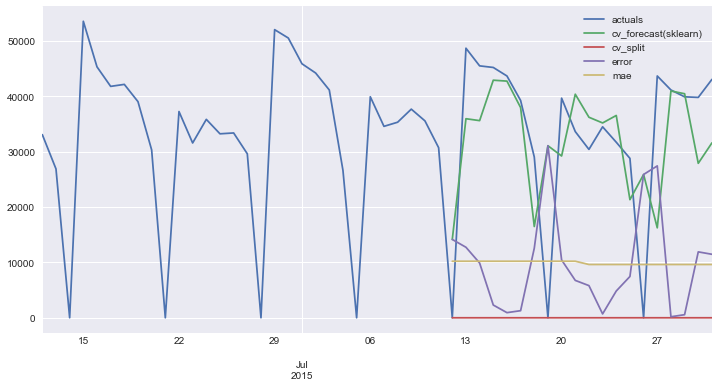

In [15]:
result.df_plot.tail(50).plot();

In [16]:
result

ModelSelectorResult
-------------------
  best_model_name: sklearn
  frequency: D
  horizon: 10

  country_code_column: None

  partition: {'no_partition_label': ''}
  partition_hash: fb452abd91f5c3bcb8afa4162c6452c2

  df_plot: DataFrame of shape (730, 6) suited for plotting cv results with .plot()
  X_train: DataFrame of shape (730, 0) with training feature values
  y_train: DataFrame of shape (730,) with training target values
  cv_results: DataFrame of shape (2, 11) with gridsearch cv info
  best_model_cv_results: Series with gridsearch cv info
  cv_data: DataFrame of shape (20, 4) with models predictions, split and true target values
  best_model_cv_data: DataFrame of shape (20, 3) with model predictions, split and true target values

  model_reprs: Dict of model_hash and model_reprs
  best_model_hash: cff14ba00f6e9d72a4a28bea466f32aa
  best_model: Pipeline(memory=None,
         steps=[('exog_passthrough', 'passthrough'), ('holiday', 'passthrough'),
                ('model',
     

## Best Model Metadata
That can help to filter for example `cv_data` or to get a glimpse on which parameters the best model has

In [17]:
result.best_model_hash

'cff14ba00f6e9d72a4a28bea466f32aa'

In [18]:
result.best_model_name

'sklearn'

In [19]:
result.best_model_repr

"Pipeline(memory=None,steps=[('exog_passthrough','passthrough'),('holiday','passthrough'),('model',SklearnWrapper(bootstrap=True,ccp_alpha=0.0,clip_predictions_lower=None,clip_predictions_upper=None,criterion='mse',fit_params=None,lags=3,max_depth=None,max_features='auto',max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=100,n_jobs=None,name='sklearn',oob_score=False,optimize_for_horizon=False,random_state=None,verbose=0,warm_start=False))],verbose=False)"

### CV Results
Get information about how our model behaved in cross validation

In [20]:
result.best_model_cv_results['mean_fit_time']

0.0033379793167114258

Or how all the models behaved

In [21]:
result.cv_results.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
1,0.003338,0.002155,0.603447,0.054691,"SklearnWrapper(bootstrap=True, ccp_alpha=0.0, ...","{'model': SklearnWrapper(bootstrap=True, ccp_a...",-10210.797000,-9621.785000,-9916.29100,294.506000,1
0,0.002325,0.000600,0.038668,0.005383,"SklearnWrapper(clip_predictions_lower=None, cl...",{'model': SklearnWrapper(clip_predictions_lowe...,-12522.584395,-8074.404344,-10298.49437,2224.090025,2


### CV Data
Access predictions made during cross validation with possible cv splits and true target values

In [22]:
result.cv_data.head()

,split,y_true,a8aa4451260f2e6572e329955bf400d6,cff14ba00f6e9d72a4a28bea466f32aa
2015-07-12,0,0.0,26171.429013,14147.61
2015-07-13,0,48687.0,27599.262145,35951.24
2015-07-14,0,45498.0,30372.219206,35607.04
2015-07-15,0,45209.0,36301.509820,42909.40
2015-07-16,0,43669.0,35328.104719,42742.74


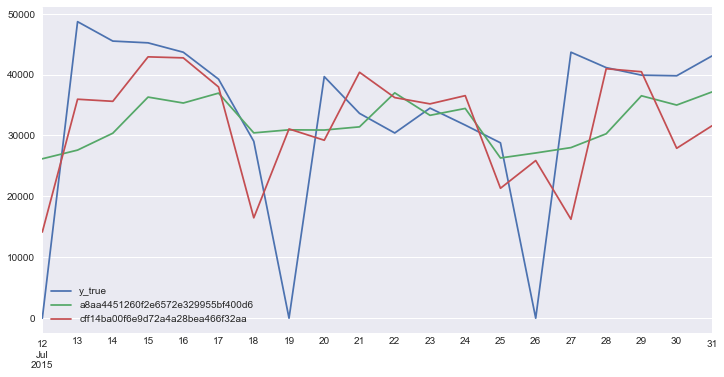

In [23]:
result.cv_data.drop(['split'], axis=1).plot();

In [24]:
result.best_model_cv_data.head()

,split,y_true,best_model
2015-07-12,0,0.0,14147.61
2015-07-13,0,48687.0,35951.24
2015-07-14,0,45498.0,35607.04
2015-07-15,0,45209.0,42909.40
2015-07-16,0,43669.0,42742.74


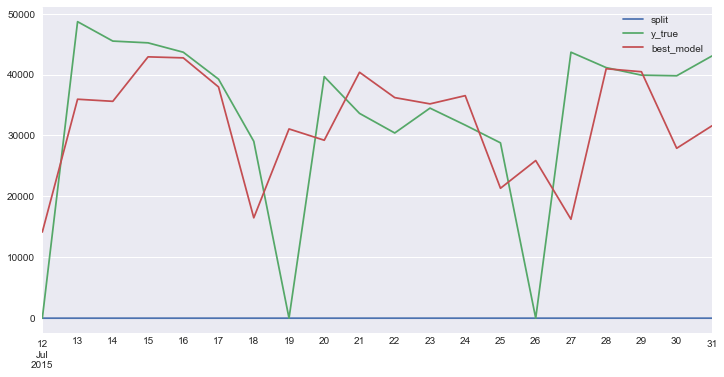

In [25]:
result.best_model_cv_data.plot();

## Plotting Functions
With `**plot_params` that you can pass depending on your plotting backend 

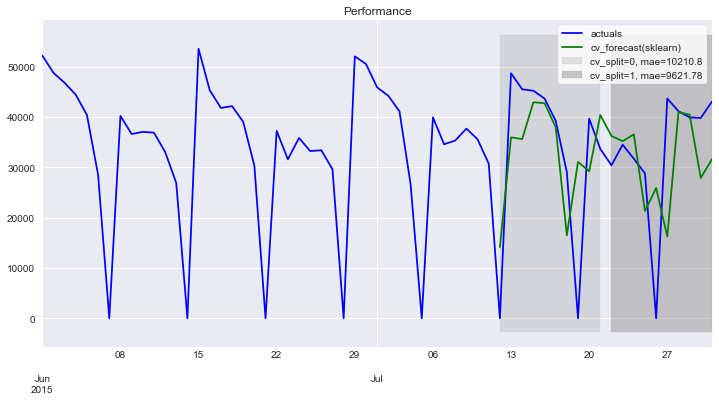

In [26]:
result.plot_result(plot_from='2015-06', title='Performance', color=['blue','green']);

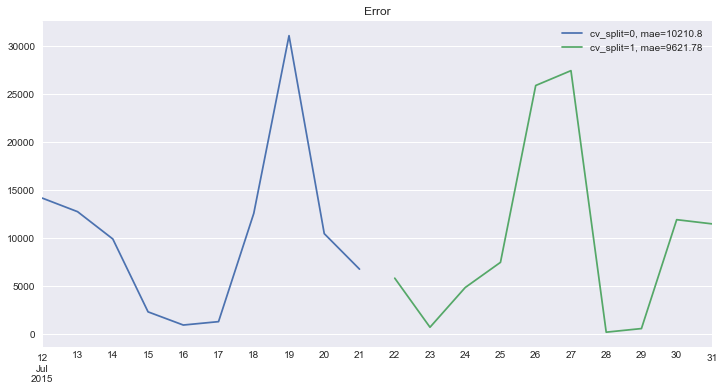

In [27]:
result.plot_error(title='Error');

## Convenient Persist Method

In [28]:
result.persist?

Signature: result.persist(attribute_name=None, path='')
Docstring:
Persist whole object or particular object attributes

Parameters
----------
attribute_name : str
    Name of the attribute to be stored - stores whole object

path: str
    Where to store the object or object attribute
    Creates file named as {partition_hash}.{attribute_name} by default at current working directory

Raises
------
ValueError
    If attribute not a valid option. Lists available ones
File:      ~/data_science/time-series-framework/src/hcrystalball/model_selection/_model_selector_result.py
Type:      method
